In [ ]:
import skimage.color as color
from skimage import segmentation

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import sobel

In [ ]:
from google.colab import files
from skimage import io

file_ = files.upload()

Saving img1.jpg to img1.jpg
Saving img2.jpg to img2.jpg
Saving img3.jpg to img3.jpg


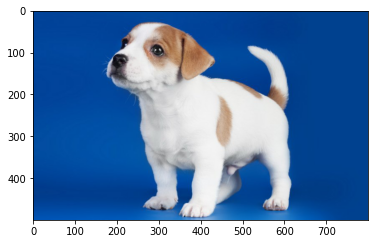

In [ ]:
image = io.imread('img1.jpg')
plt.imshow(image)

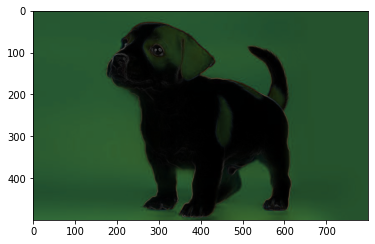

In [ ]:
#применяем фильтр Собеля, лучше погугли чтобы понять
#Позволяет получить картинку с четко выделенными границами объектов
plt.imshow(sobel(image))

In [ ]:
# Метод SLIC использует KMeans, чтобы сделать суперпиксели (большие пиксели), используя сходство пискелей по цвету и расстоянию друг от друга (он делает это одновременно).
# По сути мы делаем ~100 больших пикселей (сегментов) на картинке с примененным фильтром Собеля, и получаем список, в котором каждому пикселю присвоен свой номер (label).
# compactness - чем больше значение, тем сильнее SLIC ориентируется на расстояние между пикселями, чем на сходство их цветов, и наоборот; зависит от контрастности яркости и тд
# n_segments - количество кластеров(labels)
# У нас на всех трех картинках контрастный фон, поэтому мы используем маленькое n_segments, так как можем проводить кластеризацию по цвету
# sigma - применяет гауссов фильтр, который все немного размывает, чтобы убрать уменьшить ошибку от какого то шума
# https://scikit-image.org/docs/dev/api/skimage.segmentation.html#rbeb231216055-2

labels = segmentation.slic(sobel(image), compactness=1, n_segments=3, sigma=1, start_label=1)
print(labels)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [ ]:
#массив уникальных номеров лэйблов, они соответствуют уникальным цветам в картинке под фильтром собеля
np.unique(labels)

array([1, 2])

<ipython-input-46-c741ec81ba3e>:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  plt.imshow(color.label2rgb(labels, image))


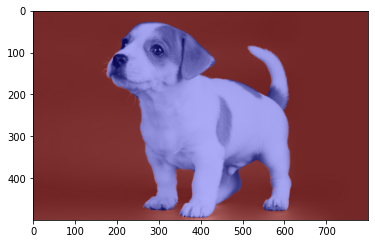

In [ ]:
#картинка с кластерами покрашенными в рандомные цвета
plt.imshow(color.label2rgb(labels, image))

In [ ]:
#наша основная функция которая делает итоговую картинку
def make_image(labels, image):
  #создаем новую картинку черного цвета
  image_done = np.zeros(image.shape)
  #в tmp по адресу каждого пикселя исходной картинки под фильтром собеля лежат значения каждого цветового канала
  #причем цвета закодированы не от 0 до 255 как обычно, а от 0 до 1
  tmp = color.label2rgb(labels, sobel(image), kind='avg')
  # Сделаем серую картинку, чтобы потом отсюда брать серые пиксели
  tmp2 = (color.rgb2gray(image)*255).clip(0, 255).round().astype('uint8')
  for i in range(tmp.shape[0]):
    for j in range(tmp.shape[1]):
    # Условие выбора: красить или делать серым - это условие не идеальное и его можно подобрать получше. 
    # Сейчас происходит сравнение среднего по пикселю ( (R + G + B)/3 ) и числа, которое нужно подбирать (мне больше всего понравилось 0.1).
    # Заметь, что в tmp цвет закодирован числом от 0 до 1, а не [0, 255]
      if np.mean(tmp[i, j]) < 0.1:
        image_done[i, j] = (image[i, j][0],
                            image[i, j][1],
                            image[i, j][2])
      else:
        image_done[i, j] = (tmp2[i, j],
                            tmp2[i, j],
                            tmp2[i, j])
  
  return image_done

<ipython-input-11-7d5c129c3241>:7: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  tmp = color.label2rgb(labels, sobel(image), kind='avg')


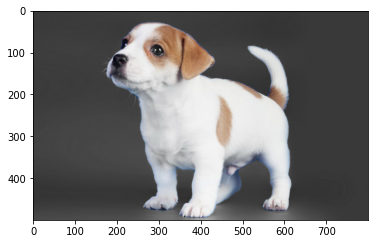

In [ ]:
plt.imshow(make_image(labels, image).astype('uint8'))

#Вторая картинка

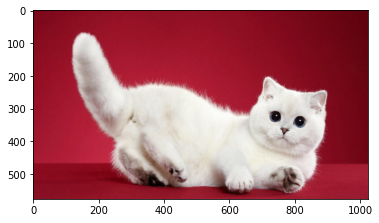

In [ ]:
image = io.imread('img2.jpg')
plt.imshow(image)

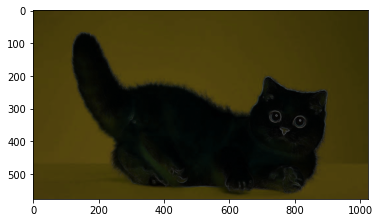

In [ ]:
plt.imshow(sobel(image))

In [ ]:
labels = segmentation.slic(sobel(image), compactness=1, n_segments=3, sigma=1, start_label=1)
np.unique(labels)

array([1, 2])

<ipython-input-58-c741ec81ba3e>:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  plt.imshow(color.label2rgb(labels, image))


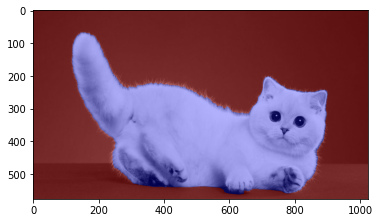

In [ ]:
plt.imshow(color.label2rgb(labels, image))

<ipython-input-53-2c2bea96530c>:3: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  tmp = color.label2rgb(labels, sobel(image), kind='avg')


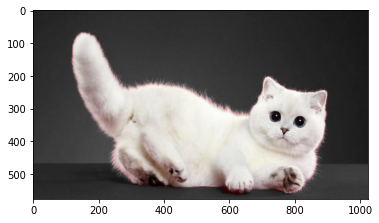

In [ ]:
plt.imshow(make_image(labels, image).astype('uint8'))

#Третья картинка

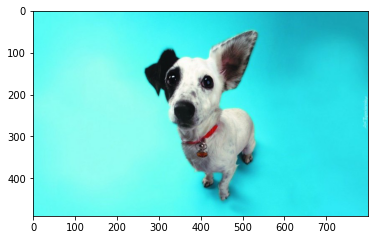

In [ ]:
image = io.imread('img3.jpg')
plt.imshow(image)

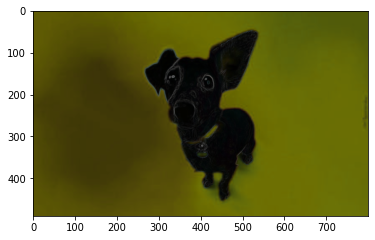

In [ ]:
plt.imshow(sobel(image))

In [ ]:
labels = segmentation.slic(sobel(image), compactness=1, n_segments=5, sigma=1, start_label=1)
np.unique(labels)

array([1, 2, 3, 4])

<ipython-input-69-c741ec81ba3e>:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  plt.imshow(color.label2rgb(labels, image))


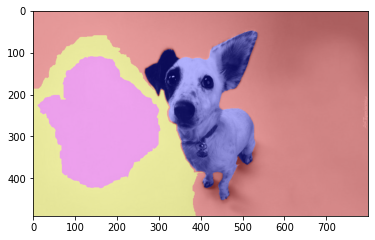

In [ ]:
plt.imshow(color.label2rgb(labels, image))

<ipython-input-53-2c2bea96530c>:3: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  tmp = color.label2rgb(labels, sobel(image), kind='avg')


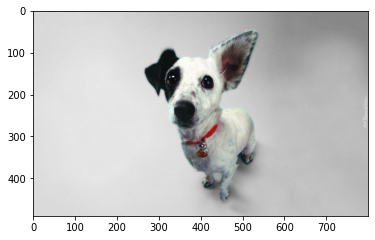

In [ ]:
plt.imshow(make_image(labels, image).astype('uint8'))